In [2]:
%run ./ml_model_init.ipynb

## Baseline Model


In [3]:
# Split the gk data into train and test sets
gk_splits = split_data(gk_player_data)

#### Linear Model


In [4]:

base_gk_lin_reg = Linear_regression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = pd.DataFrame({"base_gk_lin_reg": [base_gk_lin_reg['train_RMSE'], base_gk_lin_reg['test_RMSE'], base_gk_lin_reg['cv_rmse'], base_gk_lin_reg['R2_train'], base_gk_lin_reg['R2_test']]},
                                                        index=(['train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

gk_evaluation_stats

Training set RMSE: 0.8416633905422947
Test set RMSE: 0.7984715090688962
Training set R2: 0.8717942889402208
Test set R2: 0.8673314717208213
count    10.000000
mean      0.939203
std       0.190602
min       0.703628
25%       0.814640
50%       0.937221
75%       0.991115
max       1.288948
dtype: float64


,base_gk_lin_reg
train_RMSE,0.841663
test_RMSE,0.798472
cv_rmse,0.939203
R2_train,0.871794
R2_test,0.867331


#### DecisionTree Model


In [5]:
base_gk_dt_reg = DecisionTreeRegression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_dt_reg = [base_gk_dt_reg['train_RMSE'], base_gk_dt_reg['test_RMSE'], base_gk_dt_reg['cv_rmse'], base_gk_dt_reg['R2_train'], base_gk_dt_reg['R2_test']])

gk_evaluation_stats



Training set RMSE: 1.6794442768115936e-16
Test set RMSE: 1.1547005383792515
Training set R2: 1.0
Test set R2: 0.7225480385575134
count    10.000000
mean      1.136699
std       0.191570
min       0.834643
25%       1.003426
50%       1.142055
75%       1.201584
max       1.480206
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg
train_RMSE,0.841663,1.679444e-16
test_RMSE,0.798472,1.154701e+00
cv_rmse,0.939203,1.136699e+00
R2_train,0.871794,1.000000e+00
R2_test,0.867331,7.225480e-01


#### RandomForest Model


In [6]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_gk_rf_reg = RandomForestRegression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_rf_reg = [base_gk_rf_reg['train_RMSE'], base_gk_rf_reg['test_RMSE'], base_gk_rf_reg['cv_rmse'], base_gk_rf_reg['R2_train'], base_gk_rf_reg['R2_test']])

gk_evaluation_stats

count    10.000000
mean      0.834223
std       0.161761
min       0.566063
25%       0.783854
50%       0.828809
75%       0.926098
max       1.062140
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg
train_RMSE,0.841663,1.679444e-16,0.498951
test_RMSE,0.798472,1.154701e+00,0.798317
cv_rmse,0.939203,1.136699e+00,0.834223
R2_train,0.871794,1.000000e+00,0.954945
R2_test,0.867331,7.225480e-01,0.867383


#### XgBoost Model


In [7]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_gk_xgb_reg = XGBoostRegression(gk_splits['feature_train'], gk_splits['features_test'], gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_xgb_reg = [base_gk_xgb_reg['train_RMSE'], base_gk_xgb_reg['test_RMSE'], base_gk_xgb_reg['cv_rmse'], base_gk_xgb_reg['R2_train'], base_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890
R2_train,0.871794,1.000000e+00,0.954945,0.922045
R2_test,0.867331,7.225480e-01,0.867383,0.879354


# Feature engineering


## Goalkeepers


### VarianceThreshold


In [8]:
VT_scaler = StandardScaler()
VT_scaler.fit(gk_splits['feature_train'])
df_gk_train_scaled = pd.DataFrame(VT_scaler.fit_transform(gk_splits['feature_train']), columns=gk_splits['feature_train'].columns)
df_gk_test_scaled = pd.DataFrame(VT_scaler.transform(gk_splits['features_test']), columns=gk_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_gk_train_scaled)

gk_threshold_columns = df_gk_train_scaled.columns[selector.get_support()]

gk_threshold_train = df_gk_train_scaled[gk_threshold_columns]
gk_threshold_test = df_gk_test_scaled[gk_threshold_columns]

gk_threshold_train.shape, gk_threshold_test.shape

((888, 16), (222, 16))

#### Model(VT)


##### Linear Model


In [9]:

VarT_gk_lin_reg = Linear_regression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_lin_reg =  [VarT_gk_lin_reg['train_RMSE'], VarT_gk_lin_reg['test_RMSE'], VarT_gk_lin_reg['cv_rmse'], VarT_gk_lin_reg['R2_train'], VarT_gk_lin_reg['R2_test']])

gk_evaluation_stats

Training set RMSE: 0.8422630695010324
Test set RMSE: 0.801947940440274
Training set R2: 0.8716115326098374
Test set R2: 0.8661737170447281
count    1.000000e+01
mean     2.801335e+11
std      8.858600e+11
min      7.045110e-01
25%      8.351886e-01
50%      9.310997e-01
75%      1.129821e+00
max      2.801335e+12
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01


##### DecisionTree Model


In [10]:
VarT_gk_dt_reg = DecisionTreeRegression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_dt_reg = [VarT_gk_dt_reg['train_RMSE'], VarT_gk_dt_reg['test_RMSE'], VarT_gk_dt_reg['cv_rmse'], VarT_gk_dt_reg['R2_train'], VarT_gk_dt_reg['R2_test']])

gk_evaluation_stats



Training set RMSE: 1.6594897749825245e-16
Test set RMSE: 1.0946223998247973
Training set R2: 1.0
Test set R2: 0.7506681697847923
count    10.000000
mean      1.135447
std       0.195486
min       0.911845
25%       0.971608
50%       1.103828
75%       1.245989
max       1.441753
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01


##### RandomForest Model


In [11]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_gk_rf_reg = RandomForestRegression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_rf_reg = [VarT_gk_rf_reg['train_RMSE'], VarT_gk_rf_reg['test_RMSE'], VarT_gk_rf_reg['cv_rmse'], VarT_gk_rf_reg['R2_train'], VarT_gk_rf_reg['R2_test']])

gk_evaluation_stats

count    10.000000
mean      0.833217
std       0.161477
min       0.566704
25%       0.785136
50%       0.823482
75%       0.924742
max       1.061599
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619


##### XgBoost Model


In [12]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_gk_xgb_reg = XGBoostRegression(gk_threshold_train, gk_threshold_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_xgb_reg = [VarT_gk_xgb_reg['train_RMSE'], VarT_gk_xgb_reg['test_RMSE'], VarT_gk_xgb_reg['cv_rmse'], VarT_gk_xgb_reg['R2_train'], VarT_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354


### Feature selection techniques


#### K-best features


In [13]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, gk_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(gk_threshold_train, gk_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, gk_splits['target_train'])

  k_sel_cols = gk_threshold_train.columns[selector.get_support()]
  k_sel_X_test = gk_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, gk_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[0.773, 0.83, 0.845, 0.862, 0.882, 0.877, 0.871, 0.861, 0.868, 0.862, 0.857, 0.851, 0.854, 0.842, 0.855] 4


In [14]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat+1)
selector.fit_transform(gk_threshold_train, gk_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = gk_threshold_train[sel_feats]
k_sel_X_test = gk_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [15]:

KBest_gk_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_lin_reg =  [KBest_gk_lin_reg['train_RMSE'], KBest_gk_lin_reg['test_RMSE'], KBest_gk_lin_reg['cv_rmse'], KBest_gk_lin_reg['R2_train'], KBest_gk_lin_reg['R2_test']])

gk_evaluation_stats

Training set RMSE: 0.8689854643783074
Test set RMSE: 0.811942479714434
Training set R2: 0.8633355615461394
Test set R2: 0.8628172229658717
count    10.000000
mean      0.869069
std       0.161831
min       0.627272
25%       0.741622
50%       0.862513
75%       0.976149
max       1.146912
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817


###### DecisionTree Model


In [16]:
KBest_gk_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_dt_reg = [KBest_gk_dt_reg['train_RMSE'], KBest_gk_dt_reg['test_RMSE'], KBest_gk_dt_reg['cv_rmse'], KBest_gk_dt_reg['R2_train'], KBest_gk_dt_reg['R2_test']])

gk_evaluation_stats



Training set RMSE: 1.1781585706416543e-16
Test set RMSE: 1.1682743106243776
Training set R2: 1.0
Test set R2: 0.7159866746044815
count    10.000000
mean      1.187218
std       0.205923
min       0.854598
25%       1.092004
50%       1.129638
75%       1.348435
max       1.539736
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985,1.178159e-16
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942,1.168274e+00
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069,1.187218e+00
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336,1.000000e+00
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817,7.159867e-01


###### RandomForest Model


In [17]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_gk_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_rf_reg = [KBest_gk_rf_reg['train_RMSE'], KBest_gk_rf_reg['test_RMSE'], KBest_gk_rf_reg['cv_rmse'], KBest_gk_rf_reg['R2_train'], KBest_gk_rf_reg['R2_test']])

gk_evaluation_stats

count    10.000000
mean      0.875024
std       0.162230
min       0.627636
25%       0.847798
50%       0.870788
75%       0.936827
max       1.154748
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985,1.178159e-16,0.520146
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942,1.168274e+00,0.826717
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069,1.187218e+00,0.875024
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336,1.000000e+00,0.951035
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817,7.159867e-01,0.857779


###### XgBoost Model


In [18]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_gk_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_xgb_reg = [KBest_gk_xgb_reg['train_RMSE'], KBest_gk_xgb_reg['test_RMSE'], KBest_gk_xgb_reg['cv_rmse'], KBest_gk_xgb_reg['R2_train'], KBest_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985,1.178159e-16,0.520146,0.690983
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942,1.168274e+00,0.826717,0.787520
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069,1.187218e+00,0.875024,0.851033
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336,1.000000e+00,0.951035,0.913590
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817,7.159867e-01,0.857779,0.870946


#### Mutual Information


In [19]:
from sklearn.feature_selection import mutual_info_regression
# gk_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, gk_splits['target_train'])
mutual_info

array([0.        , 0.11562601, 0.5581805 , 0.32637382, 0.08333084])

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

clean_sheets               0.558181
ict_index                  0.326374
expected_goals_conceded    0.115626
xP                         0.083331
minutes                    0.000000
dtype: float64

<Axes: >

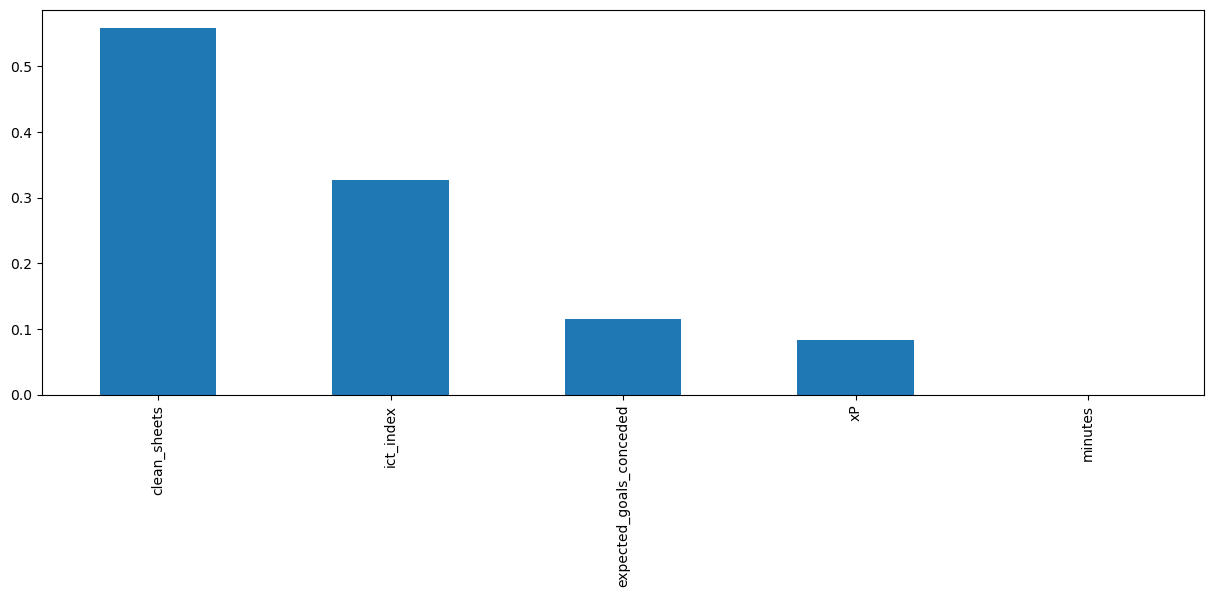

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [22]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, gk_splits['target_train'])

selected_top_columns.get_support()

array([False, False,  True,  True, False])

In [23]:
gk_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

gk_20_train = k_sel_X_train[gk_20_columns]
gk_20_test = k_sel_X_test[gk_20_columns]


In [24]:
gk_20_train.shape, gk_20_test.shape

((888, 2), (222, 2))

##### Model (MI)


###### Linear Model


In [25]:

MI_gk_lin_reg = Linear_regression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_lin_reg =  [MI_gk_lin_reg['train_RMSE'], MI_gk_lin_reg['test_RMSE'], MI_gk_lin_reg['cv_rmse'], MI_gk_lin_reg['R2_train'], MI_gk_lin_reg['R2_test']])

gk_evaluation_stats

Training set RMSE: 0.917622716448778
Test set RMSE: 0.8404083144319432
Training set R2: 0.8476091786478938
Test set R2: 0.8530296448854671
count    10.000000
mean      0.910067
std       0.178369
min       0.651436
25%       0.839052
50%       0.892395
75%       1.023180
max       1.249771
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985,1.178159e-16,0.520146,0.690983,0.917623
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942,1.168274e+00,0.826717,0.787520,0.840408
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069,1.187218e+00,0.875024,0.851033,0.910067
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336,1.000000e+00,0.951035,0.913590,0.847609
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817,7.159867e-01,0.857779,0.870946,0.853030


###### DecisionTree Model


In [26]:
MI_gk_dt_reg = DecisionTreeRegression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_dt_reg = [MI_gk_dt_reg['train_RMSE'], MI_gk_dt_reg['test_RMSE'], MI_gk_dt_reg['cv_rmse'], MI_gk_dt_reg['R2_train'], MI_gk_dt_reg['R2_test']])

gk_evaluation_stats



Training set RMSE: 0.7746134505710593
Test set RMSE: 0.9868867244821561
Training set R2: 0.8914073165959071
Test set R2: 0.7973327023759686
count    10.000000
mean      0.991462
std       0.175876
min       0.661651
25%       0.943257
50%       0.979752
75%       1.020222
max       1.339507
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985,1.178159e-16,0.520146,0.690983,0.917623,0.774613
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942,1.168274e+00,0.826717,0.787520,0.840408,0.986887
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069,1.187218e+00,0.875024,0.851033,0.910067,0.991462
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336,1.000000e+00,0.951035,0.913590,0.847609,0.891407
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817,7.159867e-01,0.857779,0.870946,0.853030,0.797333


###### RandomForest Model


In [27]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_gk_rf_reg = RandomForestRegression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_rf_reg = [MI_gk_rf_reg['train_RMSE'], MI_gk_rf_reg['test_RMSE'], MI_gk_rf_reg['cv_rmse'], MI_gk_rf_reg['R2_train'], MI_gk_rf_reg['R2_test']])

gk_evaluation_stats

count    10.000000
mean      0.946838
std       0.176115
min       0.624671
25%       0.893633
50%       0.943220
75%       0.977374
max       1.323231
dtype: float64


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985,1.178159e-16,0.520146,0.690983,0.917623,0.774613,0.787503
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942,1.168274e+00,0.826717,0.787520,0.840408,0.986887,0.905783
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069,1.187218e+00,0.875024,0.851033,0.910067,0.991462,0.946838
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336,1.000000e+00,0.951035,0.913590,0.847609,0.891407,0.887763
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817,7.159867e-01,0.857779,0.870946,0.853030,0.797333,0.829275


###### XgBoost Model


In [28]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_gk_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_xgb_reg = [MI_gk_xgb_reg['train_RMSE'], MI_gk_xgb_reg['test_RMSE'], MI_gk_xgb_reg['cv_rmse'], MI_gk_xgb_reg['R2_train'], MI_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg,MI_gk_xgb_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985,1.178159e-16,0.520146,0.690983,0.917623,0.774613,0.787503,0.690983
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942,1.168274e+00,0.826717,0.787520,0.840408,0.986887,0.905783,0.787520
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069,1.187218e+00,0.875024,0.851033,0.910067,0.991462,0.946838,0.851033
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336,1.000000e+00,0.951035,0.913590,0.847609,0.891407,0.887763,0.913590
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817,7.159867e-01,0.857779,0.870946,0.853030,0.797333,0.829275,0.870946


# Best Stats


In [29]:
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg,MI_gk_xgb_reg
train_RMSE,0.841663,1.679444e-16,0.498951,0.656307,8.422631e-01,1.659490e-16,0.499498,0.656307,0.868985,1.178159e-16,0.520146,0.690983,0.917623,0.774613,0.787503,0.690983
test_RMSE,0.798472,1.154701e+00,0.798317,0.761432,8.019479e-01,1.094622e+00,0.800614,0.761432,0.811942,1.168274e+00,0.826717,0.787520,0.840408,0.986887,0.905783,0.787520
cv_rmse,0.939203,1.136699e+00,0.834223,0.842890,2.801335e+11,1.135447e+00,0.833217,0.842890,0.869069,1.187218e+00,0.875024,0.851033,0.910067,0.991462,0.946838,0.851033
R2_train,0.871794,1.000000e+00,0.954945,0.922045,8.716115e-01,1.000000e+00,0.954846,0.922045,0.863336,1.000000e+00,0.951035,0.913590,0.847609,0.891407,0.887763,0.913590
R2_test,0.867331,7.225480e-01,0.867383,0.879354,8.661737e-01,7.506682e-01,0.866619,0.879354,0.862817,7.159867e-01,0.857779,0.870946,0.853030,0.797333,0.829275,0.870946


In [30]:
# Goalkeepers
#### XgBoost Model under the Variance threshold performed better
